We will be storing the data in Foxglove Data Platform. To do this, we need to create a Foxglove account and create a project. 
Generate a Device ID and use it to fecth the data from the device.

In [1]:
# Install the neccesary packages
%pip install mcap-protobuf-support==0.0.10 mcap-ros2-support==0.1.0 mcap-ros1-support==0.4.0 foxglove-data-platform==0.2.3 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Create your Foxglove account here: https://app.foxglove.dev/ and generate a Device ID here: https://app.foxglove.dev/devices
Create your own API key here: https://app.foxglove.dev/settings

In [2]:
from foxglove_data_platform.client import Client

# Read-only public key for demonstration purposes
client = Client(token="fox_sk_GHYaDcMX4xXT80f4NNFtg8q8mMGxDMBD")

In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from datetime import datetime
import pandas as pd

all_devices_coverage = client.get_coverage(start=datetime(2023, 5, 20), end=datetime(2023,5,25))
all_devices_coverage = sorted(all_devices_coverage, key=lambda c: c['start'])
pd.DataFrame(all_devices_coverage).head()

,device_id,start,end
0,dev_LWdg0mQBdWdFhv1C,2023-05-22 06:18:59.946194+00:00,2023-05-22 06:20:26.670349+00:00


In [10]:
device_id = "dev_LWdg0mQBdWdFhv1C"
coverage = [r for r in all_devices_coverage if r["device_id"] == device_id]
print(coverage)

[{'device_id': 'dev_LWdg0mQBdWdFhv1C', 'start': datetime.datetime(2023, 5, 22, 6, 18, 59, 946194, tzinfo=tzutc()), 'end': datetime.datetime(2023, 5, 22, 6, 20, 26, 670349, tzinfo=tzutc())}]


In [13]:
%pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 660.6 kB/s eta 0:00:12
      --------------------------------------- 0.1/7.6 MB 1.4 MB/s eta 0:00:06
      --------------------------------------- 0.2/7.6 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.3/7.6 MB 1.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/7.6 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/7.6 MB 2.2 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/7.6 MB 2.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.6 MB 3.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.6 MB 3.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.6 MB 4.0 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/7.6 MB 4.0 MB/s eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


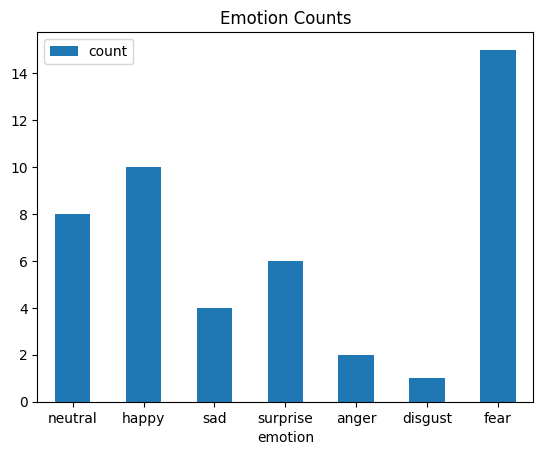

In [16]:
# topics = client.get_topics(device_id=device_id, start=coverage[1]["start"], end=coverage[1]["end"])
# pd.DataFrame(topics)

# Create a dictionary of emotion labels with number of occurences
emotion_dict = {
    "neutral": 2,
    "happy": 10,
    "sad": 4,
    "surprise": 6,
    "anger": 2,
    "disgust": 1,
    "fear": 15,
    "neutral": 8,
}

# Create a dataframe from the dictionary
df = pd.DataFrame(emotion_dict.items(), columns=["emotion", "count"])

# save the plot as a image file
df.plot.bar(x="emotion", y="count", rot=0, title="Emotion Counts").get_figure().savefig("emotion_counts.png")

